In [1]:
#library
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import os
print(os.listdir("../data"))

['gender_submission.csv', 'test.csv', 'train.csv']


## Data Dictonary

    Variable	Definition	    Key
    survival	Survival	    0 = No, 1 = Yes
    pclass	  Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
    sex	     Sex	
    Age	     Age in years	
    sibsp	   # of siblings / spouses aboard the Titanic	
    parch	   # of parents / children aboard the Titanic	
    ticket	  Ticket number	
    fare	    Passenger fare	
    cabin	   Cabin number	
    embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

## Variable Note

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [2]:
#read in the row data
test_df = pd.read_csv('../data/test.csv')
train_df = pd.read_csv('../data/train.csv')
train_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [3]:
train_df = train_df.set_index('PassengerId')

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [5]:
train_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [6]:
train_df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [7]:
train_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [8]:
#data processing
train_df.shape

(891, 11)

In [9]:
#train_df_df processing
train_df.isnull().sum() # check the number of null values

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

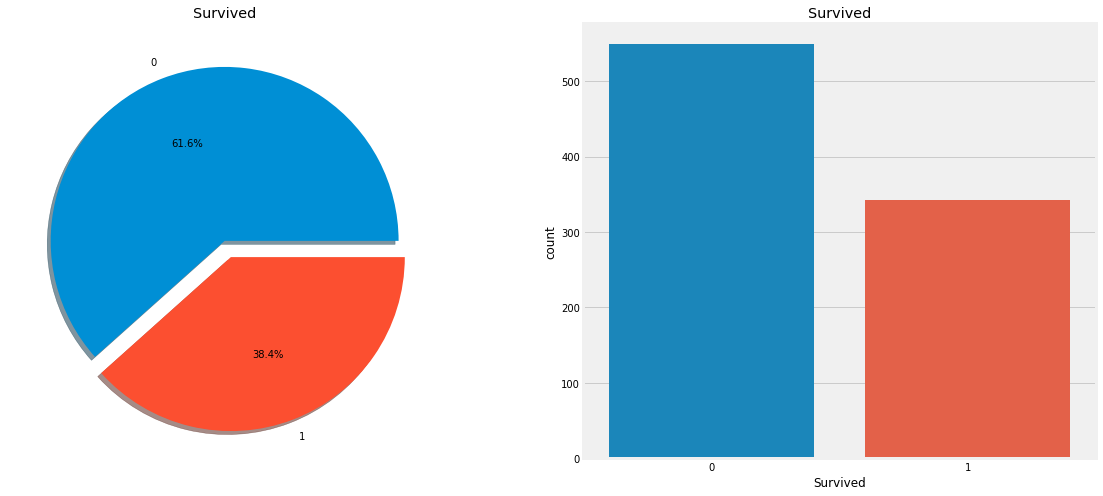

In [10]:
#dependant variable
fig,ax=plt.subplots(1,2,figsize=(18,8))
train_df['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=train_df,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

In [11]:
#feature analysis-Sex (categorical feature)
train_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

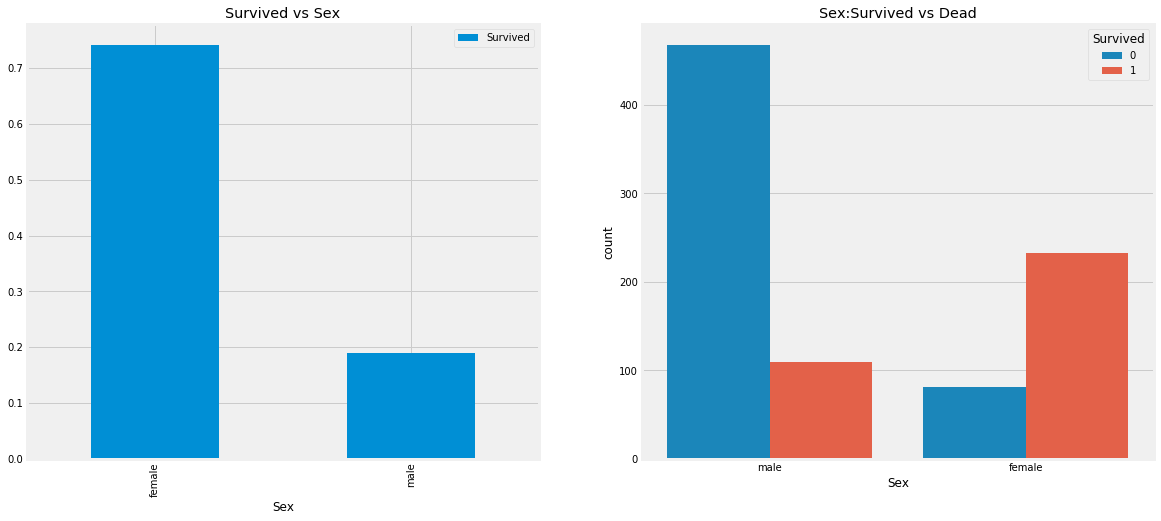

In [12]:
fig,ax=plt.subplots(1,2,figsize=(18,8))
train_df[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived',data=train_df,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

In [13]:
#feature analysis-Pclass (Ordinal feature)
pd.crosstab(train_df.Pclass,train_df.Survived,margins=True).style.background_gradient(cmap='summer_r')

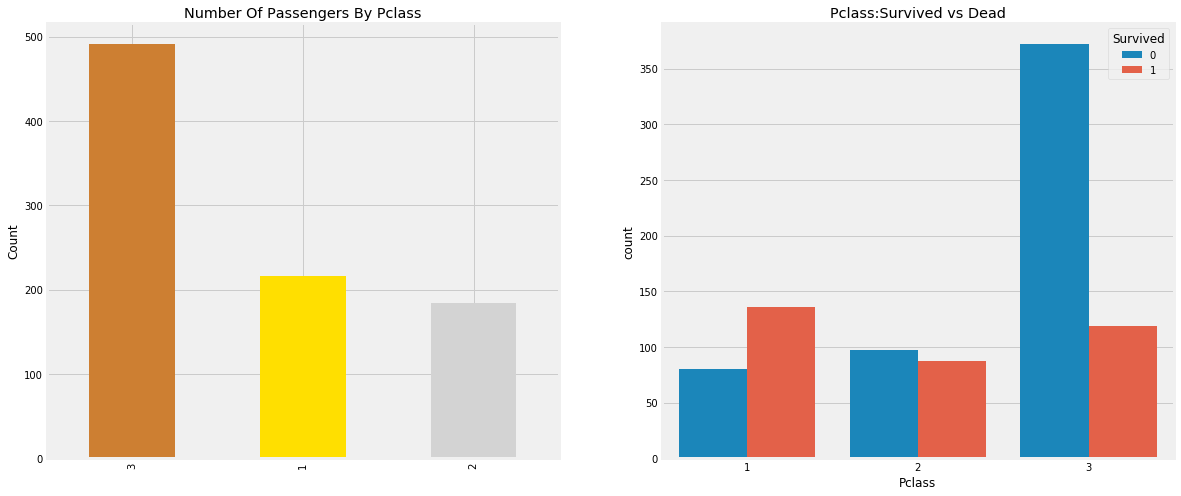

In [14]:
fig,ax=plt.subplots(1,2,figsize=(18,8))
train_df['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=train_df,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

In [15]:
# feature analysis-Sex and Pclass together
pd.crosstab([train_df.Sex,train_df.Pclass],train_df.Survived,margins=True).style.background_gradient(cmap='summer_r')


In [72]:
train_df[(train_df['Survived'] == 0) & (train_df['Sex'] == 'female') &(train_df['Pclass'] < 3)]

Survived  Pclass  \
PassengerId                     
42                  0       2   
178                 0       1   
200                 0       2   
298                 0       1   
313                 0       2   
358                 0       2   
499                 0       1   
773                 0       2   
855                 0       2   

                                                          Name     Sex   Age  \
PassengerId                                                                    
42           Turpin, Mrs. William John Robert (Dorothy Ann ...  female  27.0   
178                                 Isham, Miss. Ann Elizabeth  female  50.0   
200                     Yrois, Miss. Henriette ("Mrs Harbeck")  female  24.0   
298                               Allison, Miss. Helen Loraine  female   2.0   
313                      Lahtinen, Mrs. William (Anna Sylfven)  female  26.0   
358                                  Funk, Miss. Annie Clemmer  female  38.0   
499            Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female  25.0   
773                                          Mack, Mrs. (Mary)  female  57.0   
855              Carter, Mrs. Ernest Courtenay (Lilian Hughes)  female  44.0   

             SibSp  Parch       Ticket      Fare    Cabin Embarked Initial  \
PassengerId                                                                  
42               1      0        11668   21.0000        0        S     Mrs   
178              0      0     PC 17595   28.7125      C49        C    Miss   
200              0      0       248747   13.0000        0        S    Miss   
298              1      2       113781  151.5500  C22 C26        S    Miss   
313              1      1       250651   26.0000        0        S     Mrs   
358              0      0       237671   13.0000        0        S    Miss   
499              1      2       113781  151.5500  C22 C26        S     Mrs   
773              0      0  S.O./P.P. 3   10.5000      E77        S     Mrs   
855              1      0       244252   26.0000        0        S     Mrs   

            cabin_init  cabined  
PassengerId                      
42                   0        0  
178                  C        1  
200                  0        0  
298                  C        1  
313                  0        0  
358                  0        0  
499                  C        1  
773                  E        1  
855                  0        0

In [73]:
train_df[(train_df['Survived'] == 1) & (train_df['Sex'] == 'female') &(train_df['Pclass'] < 3)]

Survived  Pclass  \
PassengerId                     
2                   1       1   
4                   1       1   
10                  1       2   
12                  1       1   
16                  1       2   
...               ...     ...   
872                 1       1   
875                 1       2   
880                 1       1   
881                 1       2   
888                 1       1   

                                                          Name     Sex   Age  \
PassengerId                                                                    
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
10                         Nasser, Mrs. Nicholas (Adele Achem)  female  14.0   
12                                    Bonnell, Miss. Elizabeth  female  58.0   
16                            Hewlett, Mrs. (Mary D Kingcome)   female  55.0   
...                                                        ...     ...   ...   
872           Beckwith, Mrs. Richard Leonard (Sallie Monypeny)  female  47.0   
875                      Abelson, Mrs. Samuel (Hannah Wizosky)  female  28.0   
880              Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)  female  56.0   
881               Shelley, Mrs. William (Imanita Parrish Hall)  female  25.0   
888                               Graham, Miss. Margaret Edith  female  19.0   

             SibSp  Parch     Ticket     Fare Cabin Embarked Initial  \
PassengerId                                                            
2                1      0   PC 17599  71.2833   C85        C     Mrs   
4                1      0     113803  53.1000  C123        S     Mrs   
10               1      0     237736  30.0708     0        C     Mrs   
12               0      0     113783  26.5500  C103        S    Miss   
16               0      0     248706  16.0000     0        S     Mrs   
...            ...    ...        ...      ...   ...      ...     ...   
872              1      1      11751  52.5542   D35        S     Mrs   
875              1      0  P/PP 3381  24.0000     0        C     Mrs   
880              0      1      11767  83.1583   C50        C     Mrs   
881              0      1     230433  26.0000     0        S     Mrs   
888              0      0     112053  30.0000   B42        S    Miss   

            cabin_init  cabined  
PassengerId                      
2                    C        1  
4                    C        1  
10                   0        0  
12                   C        1  
16                   0        0  
...                ...      ...  
872                  D        1  
875                  0        0  
880                  C        1  
881                  0        0  
888                  B        1  

[161 rows x 14 columns]

In [74]:
train_df.groupby(['Pclass','cabin_init'])['cabin_init'].count()

Pclass  cabin_init
1       0              40
        A              15
        B              47
        C              59
        D              29
        E              25
        T               1
2       0             168
        D               4
        E               4
        F               8
3       0             479
        E               3
        F               5
        G               4
Name: cabin_init, dtype: int64

In [80]:
train_df.groupby(['Survived','cabined','cabin_init'])['cabin_init'].count()

Survived  cabined  cabin_init
0         0        0             481
          1        A               8
                   B              12
                   C              24
                   D               8
                   E               8
                   F               5
                   G               2
                   T               1
1         0        0             206
          1        A               7
                   B              35
                   C              35
                   D              25
                   E              24
                   F               8
                   G               2
Name: cabin_init, dtype: int64

In [83]:
train_df.groupby(['Survived','cabined','Pclass'])['Pclass'].count()

Survived  cabined  Pclass
0         0        1          21
                   2          94
                   3         366
          1        1          59
                   2           3
                   3           6
1         0        1          19
                   2          74
                   3         113
          1        1         117
                   2          13
                   3           6
Name: Pclass, dtype: int64

In [78]:
train_df[(train_df['Survived'] == 0) & (train_df['cabin_init'] != '0') &(train_df['Pclass'] == 3)]

Survived  Pclass                                        Name  \
PassengerId                                                                 
76                  0       3                     Moen, Mr. Sigurd Hansen   
206                 0       3                  Strom, Miss. Telma Matilda   
252                 0       3  Strom, Mrs. Wilhelm (Elna Matilda Persson)   
700                 0       3    Humblen, Mr. Adolf Mathias Nicolai Olsen   
716                 0       3  Soholt, Mr. Peter Andreas Lauritz Andersen   
777                 0       3                            Tobin, Mr. Roger   

                Sex   Age  SibSp  Parch  Ticket     Fare  Cabin Embarked  \
PassengerId                                                                
76             male  25.0      0      0  348123   7.6500  F G73        S   
206          female   2.0      0      1  347054  10.4625     G6        S   
252          female  29.0      1      1  347054  10.4625     G6        S   
700            male  42.0      0      0  348121   7.6500  F G63        S   
716            male  19.0      0      0  348124   7.6500  F G73        S   
777            male  33.0      0      0  383121   7.7500    F38        Q   

            Initial cabin_init  cabined  
PassengerId                              
76               Mr          F        1  
206            Miss          G        1  
252             Mrs          G        1  
700              Mr          F        1  
716              Mr          F        1  
777              Mr          F        1

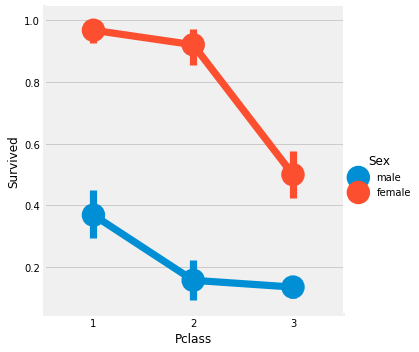

In [16]:
sns.factorplot('Pclass','Survived',hue='Sex',data=train_df)
plt.show()

In [17]:
# feature analysis-Age (Continuous feature)
print('Oldest Passenger was of:',train_df['Age'].max(),'Years')
print('Youngest Passenger was of:',train_df['Age'].min(),'Years')
print('Average Age on the ship:',train_df['Age'].mean(),'Years')


Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


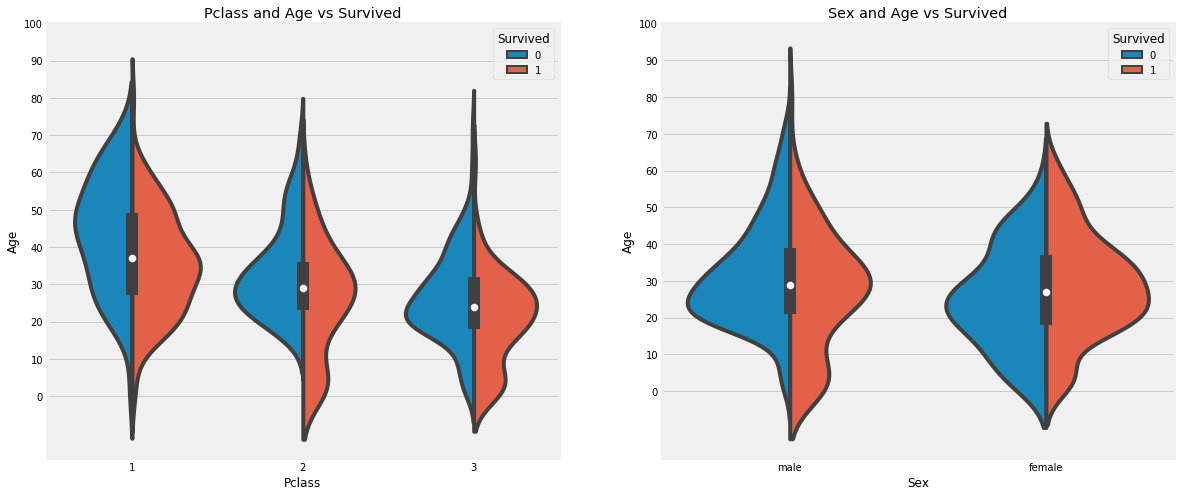

In [18]:
fig,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived", data=train_df,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=train_df,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

In [19]:
#handle the missig value for Age
#find the Salutations and repace the NaN with the mean of age for that group
train_df['Initial']=0
for i in train_df:
    train_df['Initial']=train_df.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations

pd.crosstab(train_df.Initial,train_df.Sex).T.style.background_gradient(cmap='summer_r')

In [20]:
#correct the miss-spelling and replace
train_df['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [86]:
train_df.groupby(['Initial'])['Age'].mean()

Initial
Master     4.616750
Miss      21.887097
Mr        32.798677
Mrs       35.984252
Other     45.888889
Name: Age, dtype: float64

In [88]:
train_df[train_df['Initial'] == 'Master'].head()

Survived  Pclass                                Name   Sex   Age  \
PassengerId                                                                     
8                   0       3      Palsson, Master. Gosta Leonard  male   2.0   
17                  0       3                Rice, Master. Eugene  male   2.0   
51                  0       3          Panula, Master. Juha Niilo  male   7.0   
60                  0       3  Goodwin, Master. William Frederick  male  11.0   
64                  0       3               Skoog, Master. Harald  male   4.0   

             SibSp  Parch   Ticket     Fare Cabin Embarked Initial cabin_init  \
PassengerId                                                                     
8                3      1   349909  21.0750     0        S  Master          0   
17               4      1   382652  29.1250     0        Q  Master          0   
51               4      1  3101295  39.6875     0        S  Master          0   
60               5      2  CA 2144  46.9000     0        S  Master          0   
64               3      2   347088  27.9000     0        S  Master          0   

             cabined  
PassengerId           
8                  0  
17                 0  
51                 0  
60                 0  
64                 0

In [89]:
pd.crosstab(train_df.Initial,train_df.Survived).T.style.background_gradient(cmap='summer_r')

In [21]:
#replace the NaN with group mean of age (ceil values of the mean)
train_df.groupby('Initial')['Age'].mean() 
train_df.loc[(train_df.Age.isnull())&(train_df.Initial=='Mr'),'Age']=33
train_df.loc[(train_df.Age.isnull())&(train_df.Initial=='Mrs'),'Age']=36
train_df.loc[(train_df.Age.isnull())&(train_df.Initial=='Master'),'Age']=5
train_df.loc[(train_df.Age.isnull())&(train_df.Initial=='Miss'),'Age']=22
train_df.loc[(train_df.Age.isnull())&(train_df.Initial=='Other'),'Age']=46

In [22]:
# check if there is nay NaN value for Age 
train_df.Age.isnull().any()

False

In [145]:
train_df['age_group'] = np.select([train_df.Age <9, (train_df.Age >=9) & (train_df.Age <20), train_df.Age > 55 ], 
                        [1, 2, 4], 
                        default=3)
pd.crosstab(train_df.age_group,train_df.Survived).T.style.background_gradient(cmap='summer_r')

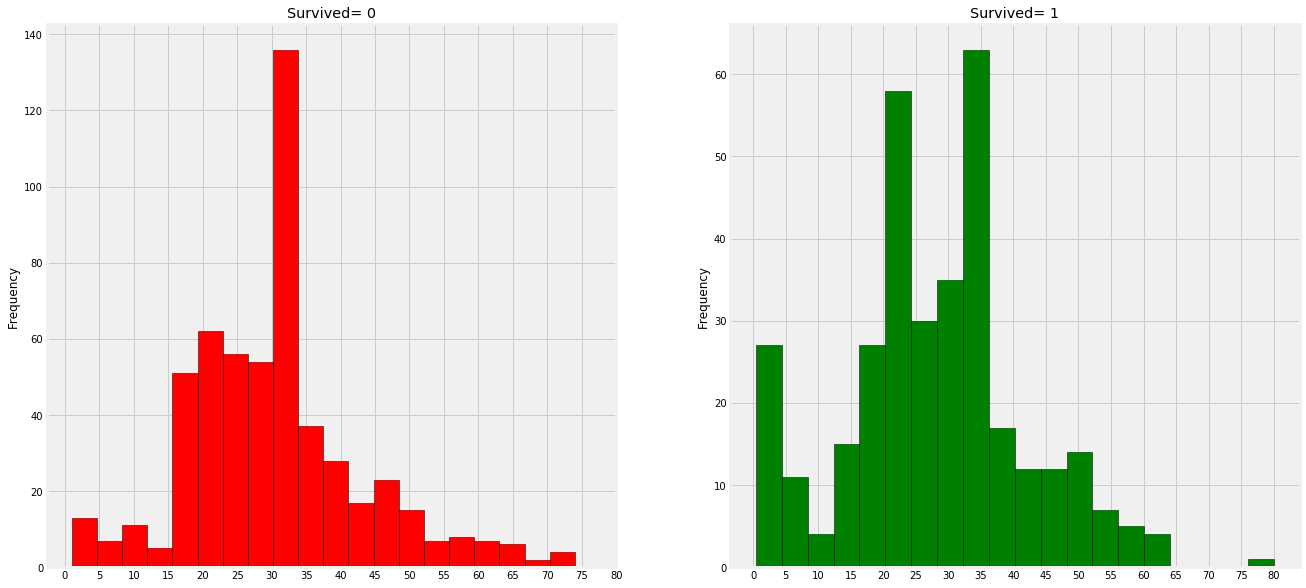

In [23]:
fig,ax=plt.subplots(1,2,figsize=(20,10))
train_df[train_df['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
train_df[train_df['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

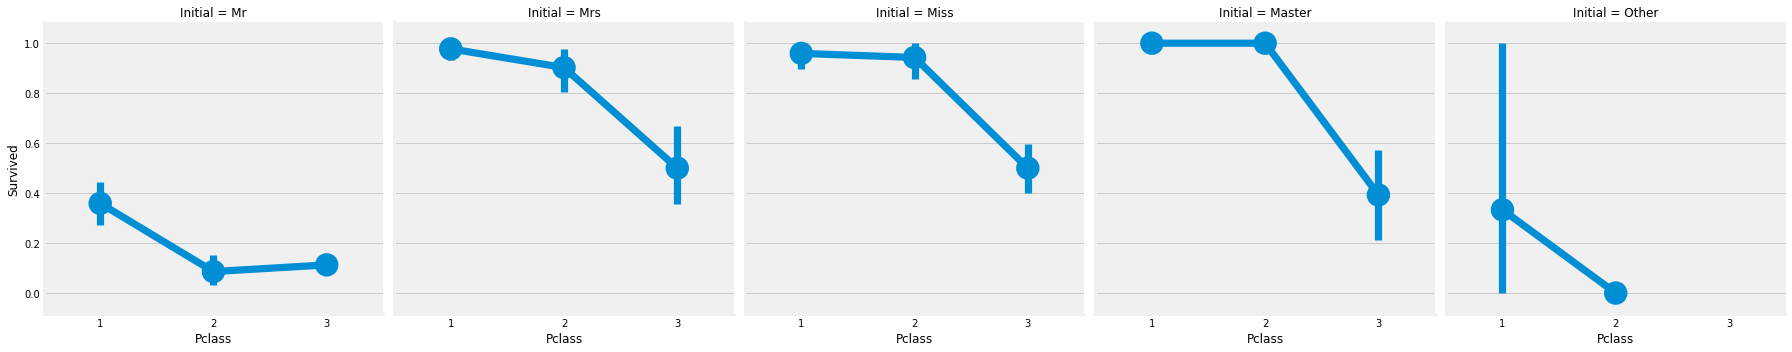

In [24]:
sns.factorplot('Pclass','Survived',col='Initial',data=train_df)
plt.show()

In [25]:
train_df.groupby(['SibSp','Survived'])['Survived'].count()

SibSp  Survived
0      0           398
       1           210
1      0            97
       1           112
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: Survived, dtype: int64

In [26]:
train_df.groupby(['Parch','Survived'])['Survived'].count()

Parch  Survived
0      0           445
       1           233
1      0            53
       1            65
2      0            40
       1            40
3      0             2
       1             3
4      0             4
5      0             4
       1             1
6      0             1
Name: Survived, dtype: int64

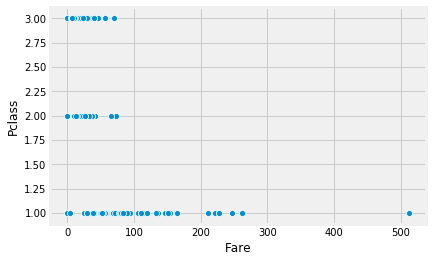

In [27]:
sns.scatterplot('Fare','Pclass',data=train_df)
plt.show()

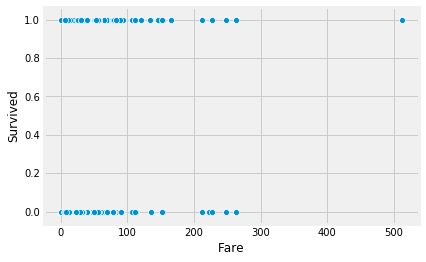

In [28]:
sns.scatterplot('Fare','Survived',data=train_df)
plt.show()

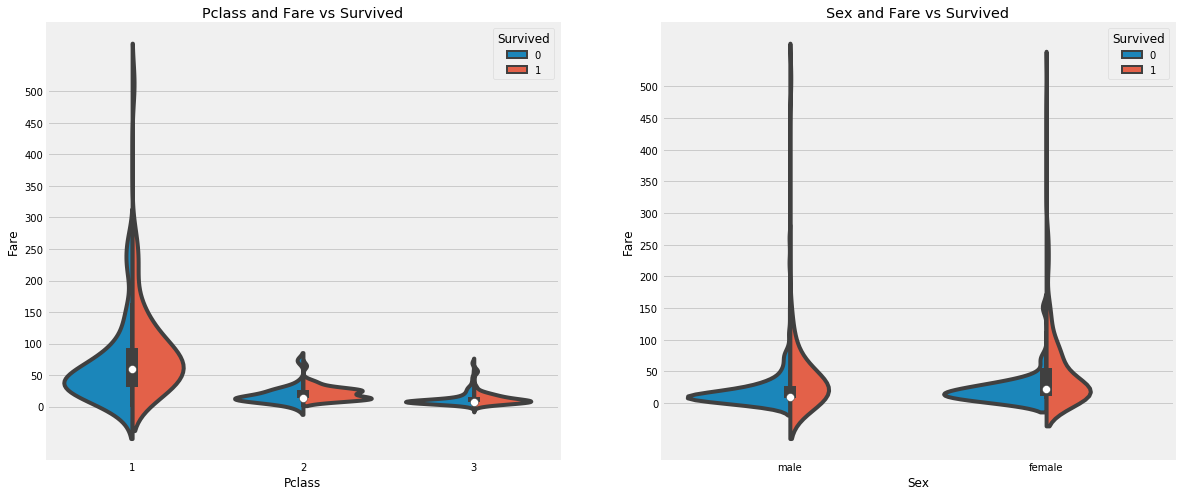

In [29]:
fig,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Fare", hue="Survived", data=train_df,split=True,ax=ax[0])
ax[0].set_title('Pclass and Fare vs Survived')
ax[0].set_yticks(range(0,550,50))
sns.violinplot("Sex","Fare", hue="Survived", data=train_df,split=True,ax=ax[1])
ax[1].set_title('Sex and Fare vs Survived')
ax[1].set_yticks(range(0,550,50))
plt.show()

In [152]:
train_df['Fare_group'] = np.select([train_df.Fare<= 15, (train_df.Fare>15) & (train_df.Fare <=50), train_df.Fare >= 100 ], 
                        [1, 2, 4], 
                        default=3)
pd.crosstab(train_df.Fare_group,train_df.Survived).T.style.background_gradient(cmap='summer_r')

In [30]:
train_df['Cabin'].value_counts()

G6             4
C23 C25 C27    4
B96 B98        4
F33            3
C22 C26        3
              ..
B73            1
C30            1
C103           1
E38            1
C85            1
Name: Cabin, Length: 147, dtype: int64

In [31]:
train_df['Cabin'] = train_df['Cabin'].fillna('0')
train_df['cabin_init'] = [x[0] for x in train_df['Cabin']]
train_df['cabin_init'].unique()

array(['0', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [32]:
train_df['Cabin'].unique()

array(['0', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [33]:
pd.crosstab(train_df.cabin_init,train_df.Survived,margins=True).style.background_gradient(cmap='summer_r')

In [34]:
train_df['cabined'] = [0 if x == '0' else 1 for x in train_df['cabin_init']]
train_df['cabined'].value_counts()

0    687
1    204
Name: cabined, dtype: int64

In [35]:
train_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [36]:
train_df[train_df['Embarked'].isnull()]

Survived  Pclass                                       Name  \
PassengerId                                                                
62                  1       1                        Icard, Miss. Amelie   
830                 1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

                Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked Initial  \
PassengerId                                                                    
62           female  38.0      0      0  113572  80.0   B28      NaN    Miss   
830          female  62.0      0      0  113572  80.0   B28      NaN     Mrs   

            cabin_init  cabined  
PassengerId                      
62                   B        1  
830                  B        1

In [37]:
train_df[train_df['cabin_init']=='B']

Survived  Pclass  \
PassengerId                     
32                  1       1   
55                  0       1   
62                  1       1   
119                 0       1   
140                 0       1   
171                 0       1   
195                 1       1   
196                 1       1   
258                 1       1   
264                 0       1   
292                 1       1   
300                 1       1   
312                 1       1   
330                 1       1   
370                 1       1   
391                 1       1   
436                 1       1   
485                 1       1   
488                 0       1   
505                 1       1   
521                 1       1   
524                 1       1   
537                 0       1   
540                 1       1   
541                 1       1   
588                 1       1   
633                 1       1   
642                 1       1   
672                 0       1   
680                 1       1   
690                 1       1   
691                 1       1   
731                 1       1   
738                 1       1   
743                 1       1   
746                 0       1   
760                 1       1   
764                 1       1   
780                 1       1   
782                 1       1   
790                 0       1   
803                 1       1   
816                 0       1   
821                 1       1   
830                 1       1   
873                 0       1   
888                 1       1   

                                                          Name     Sex   Age  \
PassengerId                                                                    
32              Spencer, Mrs. William Augustus (Marie Eugenie)  female  36.0   
55                              Ostby, Mr. Engelhart Cornelius    male  65.0   
62                                         Icard, Miss. Amelie  female  38.0   
119                                   Baxter, Mr. Quigg Edmond    male  24.0   
140                                         Giglio, Mr. Victor    male  24.0   
171                                  Van der hoef, Mr. Wyckoff    male  61.0   
195                  Brown, Mrs. James Joseph (Margaret Tobin)  female  44.0   
196                                       Lurette, Miss. Elise  female  58.0   
258                                       Cherry, Miss. Gladys  female  30.0   
264                                      Harrison, Mr. William    male  40.0   
292                    Bishop, Mrs. Dickinson H (Helen Walton)  female  19.0   
300            Baxter, Mrs. James (Helene DeLaudeniere Chaput)  female  50.0   
312                                 Ryerson, Miss. Emily Borie  female  18.0   
330                               Hippach, Miss. Jean Gertrude  female  16.0   
370                              Aubart, Mme. Leontine Pauline  female  24.0   
391                                 Carter, Mr. William Ernest    male  36.0   
436                                  Carter, Miss. Lucile Polk  female  14.0   
485                                    Bishop, Mr. Dickinson H    male  25.0   
488                                    Kent, Mr. Edward Austin    male  58.0   
505                                      Maioni, Miss. Roberta  female  16.0   
521                                      Perreault, Miss. Anne  female  30.0   
524            Hippach, Mrs. Louis Albert (Ida Sophia Fischer)  female  44.0   
537                          Butt, Major. Archibald Willingham    male  45.0   
540                         Frolicher, Miss. Hedwig Margaritha  female  22.0   
541                                    Crosby, Miss. Harriet R  female  36.0   
588                           Frolicher-Stehli, Mr. Maxmillian    male  60.0   
633                                  Stahelin-Maeglin, Dr. Max    male  32.0   
642                                       Sagesser, Mlle. Emma  female  24.

In [38]:
train_df['Embarked'] = train_df['Embarked'].fillna('S') 
train_df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [39]:
train_df[train_df['Embarked'].isnull()]

Empty DataFrame
Columns: [Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked, Initial, cabin_init, cabined]
Index: []

In [40]:
#feature engineering 

In [41]:
#modeling

# Modeling

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [43]:
df_y = train_df['Survived']
df_y.head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

In [117]:
df_X[['Pclass','Fare']].corr()

Pclass    Fare
Pclass  1.0000 -0.5495
Fare   -0.5495  1.0000

In [153]:
df_X = train_df.drop(['Survived','Name','Ticket','Cabin','cabin_init','Age','Fare'],axis = 1)

In [154]:
df_X.head()

Pclass     Sex  SibSp  Parch Embarked Initial  cabined  \
PassengerId                                                           
1                 3    male      1      0        S      Mr        0   
2                 1  female      1      0        C     Mrs        1   
3                 3  female      0      0        S    Miss        0   
4                 1  female      1      0        S     Mrs        1   
5                 3    male      0      0        S      Mr        0   

             age_group  class_group  Fare_group  
PassengerId                                      
1                    3            1           1  
2                    3            1           3  
3                    3            1           1  
4                    3            1           3  
5                    3            1           1

In [155]:
df_X = pd.get_dummies(df_X, drop_first = True)

In [130]:
df_X.head()

Pclass  SibSp  Parch  cabined  age_group  class_group  \
PassengerId                                                          
1                 3      1      0        0          2            1   
2                 1      1      0        1          2            1   
3                 3      0      0        0          2            1   
4                 1      1      0        1          2            1   
5                 3      0      0        0          2            1   

             Fare_group  Sex_male  Embarked_Q  Embarked_S  Initial_Miss  \
PassengerId                                                               
1                     1         1           0           1             0   
2                     2         0           0           0             0   
3                     1         0           0           1             1   
4                     2         0           0           1             0   
5                     1         1           0           1             0   

             Initial_Mr  Initial_Mrs  Initial_Other  
PassengerId                                          
1                     1            0              0  
2                     0            1              0  
3                     0            0              0  
4                     0            1              0  
5                     1            0              0

In [156]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3, random_state=0)

In [186]:
#### use two models based on Cabin
df_X_Cabin = df_X[df_X['cabined'] == 1].drop(['cabined'],axis = 1)
df_y_Cabin = train_df[train_df['cabined'] == 1]['Survived']

df_X_NoCabin = df_X[df_X['cabined'] == 0].drop(['cabined'],axis = 1)
df_y_NoCabin = train_df[train_df['cabined'] == 0]['Survived']

## 1. random forest tree (not split train dateset yet)

In [157]:
RF_clf = RandomForestClassifier(max_features = 8, max_depth = 5, random_state = 0)
RF_clf.fit(df_X, df_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features=8, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [158]:
print('Accuracy of RF classifier on training set: {:.2f}'.format(RF_clf.score(df_X, df_y)))

Accuracy of RF classifier on training set: 0.85


In [159]:
RF_clf2 = RandomForestClassifier(max_features = 8, max_depth = 5, random_state = 0)
RF_clf2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features=8, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [160]:
print('Accuracy of RF classifier on training set: {:.2f}'.format(RF_clf2.score(X_train, y_train)))
print('Accuracy of RF classifier on test set: {:.2f}'.format(RF_clf2.score(X_test, y_test)))

Accuracy of RF classifier on training set: 0.84
Accuracy of RF classifier on test set: 0.82


In [161]:
RF_clf3 = RandomForestClassifier(max_features = 8, max_depth = 5, class_weight='balanced', random_state = 0)
print('Cross-validation (accuracy)', cross_val_score(RF_clf3, df_X, df_y, cv=5))


Cross-validation (accuracy) [0.79329609 0.77094972 0.83146067 0.78089888 0.8700565 ]


In [188]:
RF_clf_cabin = RandomForestClassifier(max_features = 8, max_depth = 5, class_weight='balanced', random_state = 0)
print('Cross-validation Cabin(accuracy)', cross_val_score(RF_clf_cabin, df_X_Cabin, df_y_Cabin, cv=5))
print('Cross-validation NoCabin(accuracy)', cross_val_score(RF_clf_cabin, df_X_NoCabin, df_y_NoCabin, cv=5))

Cross-validation Cabin(accuracy) [0.78571429 0.82926829 0.7804878  0.575      0.75      ]
Cross-validation NoCabin(accuracy) [0.82014388 0.81751825 0.86131387 0.81021898 0.87591241]


## 2. Support Vector Machine

In [162]:
svc_clf = SVC().fit(df_X, df_y)

In [163]:
print('Accuracy of SVC classifier on training set: {:.2f}'.format(svc_clf.score(df_X, df_y)))

Accuracy of SVC classifier on training set: 0.83


In [164]:
svc_clf2 = SVC().fit(X_train, y_train)

In [165]:
print('Accuracy of SVC classifier on training set: {:.2f}'.format(svc_clf2.score(X_train, y_train)))
print('Accuracy of SVC classifier on test set: {:.2f}'.format(svc_clf2.score(X_test, y_test)))

Accuracy of SVC classifier on training set: 0.84
Accuracy of SVC classifier on test set: 0.82


In [166]:
#try some different parameters
svc_clf3 = SVC(kernel='linear', C=1).fit(X_train, y_train)
print('Accuracy of SVC classifier on training set: {:.2f}'.format(svc_clf3.score(X_train, y_train)))
print('Accuracy of SVC classifier on test set: {:.2f}'.format(svc_clf3.score(X_test, y_test)))

Accuracy of SVC classifier on training set: 0.83
Accuracy of SVC classifier on test set: 0.81


In [167]:
##cross validation
gamma_list = [0.001,0.1,1,10]
kernel_list = ['linear', 'rbf']
C_list = [1,5,10,20]
for gamma in gamma_list:
    for kernel in kernel_list:
        for C_value in C_list:
            svc_clf4 = SVC(kernel=kernel, C=C_value, class_weight='balanced',gamma = gamma)
            print('kernel:', kernel, 'C value:', C_value)
            print('gamma is: ', gamma, 'Cross-validation (accuracy)', cross_val_score(svc_clf4, df_X, df_y, cv=5))



kernel: linear C value: 1
gamma is:  0.001 Cross-validation (accuracy) [0.78212291 0.77094972 0.79213483 0.76966292 0.83615819]
kernel: linear C value: 5
gamma is:  0.001 Cross-validation (accuracy) [0.77094972 0.77094972 0.79775281 0.7752809  0.83050847]
kernel: linear C value: 10
gamma is:  0.001 Cross-validation (accuracy) [0.77094972 0.77094972 0.79775281 0.76966292 0.83050847]
kernel: linear C value: 20
gamma is:  0.001 Cross-validation (accuracy) [0.77094972 0.77094972 0.79775281 0.76966292 0.83050847]
kernel: rbf C value: 1
gamma is:  0.001 Cross-validation (accuracy) [0.67597765 0.79329609 0.81460674 0.75280899 0.78531073]
kernel: rbf C value: 5
gamma is:  0.001 Cross-validation (accuracy) [0.82681564 0.82681564 0.79775281 0.75842697 0.81355932]
kernel: rbf C value: 10
gamma is:  0.001 Cross-validation (accuracy) [0.82681564 0.82681564 0.79775281 0.75842697 0.8079096 ]
kernel: rbf C value: 20
gamma is:  0.001 Cross-validation (accuracy) [0.81564246 0.82681564 0.80337079 0.75842

In [190]:
gamma_list = [0.001,0.1,1,10]
kernel_list = ['linear', 'rbf']
C_list = [1,5,10,20]
for gamma in gamma_list:
    for kernel in kernel_list:
        for C_value in C_list:
            svc_clf_cabin = SVC(kernel=kernel, C=C_value, class_weight='balanced',gamma = gamma)
            print('kernel:', kernel, 'C value:', C_value)
            print('gamma is: ', gamma, 'Cross-validation Cabin (accuracy)', cross_val_score(svc_clf_cabin, df_X_Cabin, df_y_Cabin, cv=5))
            print('gamma is: ', gamma, 'Cross-validation NoCabin(accuracy)', cross_val_score(svc_clf_cabin, df_X_NoCabin, df_y_NoCabin, cv=5))

kernel: linear C value: 1
gamma is:  0.001 Cross-validation Cabin (accuracy) [0.83333333 0.82926829 0.7804878  0.675      0.8       ]
gamma is:  0.001 Cross-validation NoCabin(accuracy) [0.82014388 0.81751825 0.83941606 0.78832117 0.86131387]
kernel: linear C value: 5
gamma is:  0.001 Cross-validation Cabin (accuracy) [0.83333333 0.82926829 0.7804878  0.675      0.8       ]
gamma is:  0.001 Cross-validation NoCabin(accuracy) [0.82733813 0.81751825 0.83941606 0.79562044 0.86861314]
kernel: linear C value: 10
gamma is:  0.001 Cross-validation Cabin (accuracy) [0.83333333 0.82926829 0.7804878  0.675      0.8       ]
gamma is:  0.001 Cross-validation NoCabin(accuracy) [0.82733813 0.81751825 0.83211679 0.79562044 0.86861314]
kernel: linear C value: 20
gamma is:  0.001 Cross-validation Cabin (accuracy) [0.83333333 0.82926829 0.7804878  0.675      0.8       ]
gamma is:  0.001 Cross-validation NoCabin(accuracy) [0.82014388 0.81751825 0.83211679 0.79562044 0.86861314]
kernel: rbf C value: 1
gam

## 3. Naive Bayes

In [168]:
nbclf = GaussianNB().fit(df_X, df_y)
print('Accuracy of GaussianNB classifier on training set: {:.2f}'.format(nbclf.score(df_X, df_y)))

Accuracy of GaussianNB classifier on training set: 0.79


In [169]:
nbclf2 = GaussianNB().fit(X_train, y_train)

In [170]:
print('Accuracy of NB classifier on training set: {:.2f}'.format(nbclf2.score(X_train, y_train)))
print('Accuracy of NB classifier on test set: {:.2f}'.format(nbclf2.score(X_test, y_test)))

Accuracy of NB classifier on training set: 0.43
Accuracy of NB classifier on test set: 0.41


## 4. K nearest neighbor

In [171]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(df_X, df_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [172]:
print('Accuracy of KNN on training set: {:.2f}'.format(knn.score(df_X, df_y)))

Accuracy of KNN on training set: 0.85


In [173]:
knn2 = KNeighborsClassifier(n_neighbors = 3)
knn2.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [174]:
print('Accuracy of knn classifier on training set: {:.2f}'.format(knn2.score(X_train, y_train)))
print('Accuracy of knn classifier on test set: {:.2f}'.format(knn2.score(X_test, y_test)))

Accuracy of knn classifier on training set: 0.86
Accuracy of knn classifier on test set: 0.83


In [184]:
knn3 = KNeighborsClassifier(n_neighbors = 3)
print('Cross-validation (accuracy)', cross_val_score(knn3, df_X, df_y, cv=5))

Cross-validation (accuracy) [0.73184358 0.77094972 0.83146067 0.78651685 0.85310734]


In [189]:
KNN_cabin = KNeighborsClassifier(n_neighbors = 3)
print('Cross-validation Cabin(accuracy)', cross_val_score(KNN_cabin, df_X_Cabin, df_y_Cabin, cv=5))
print('Cross-validation NoCabin(accuracy)', cross_val_score(KNN_cabin, df_X_NoCabin, df_y_NoCabin, cv=5))

Cross-validation Cabin(accuracy) [0.78571429 0.73170732 0.7804878  0.625      0.725     ]
Cross-validation NoCabin(accuracy) [0.78417266 0.80291971 0.82481752 0.75912409 0.81751825]


## 5. logistic regression

In [175]:
logit_clf = LogisticRegression()
logit_clf.fit(df_X, df_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [176]:
print('Accuracy of logit on training set: {:.2f}'.format(logit_clf.score(df_X, df_y)))

Accuracy of logit on training set: 0.82


In [177]:
logit_clf2 = LogisticRegression()
logit_clf2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [178]:
print('Accuracy of logit classifier on training set: {:.2f}'.format(logit_clf2.score(X_train, y_train)))
print('Accuracy of logit classifier on test set: {:.2f}'.format(logit_clf2.score(X_test, y_test)))

Accuracy of logit classifier on training set: 0.83
Accuracy of logit classifier on test set: 0.82


In [191]:
logit_clf2_cabin =LogisticRegression()
print('Cross-validation Cabin(accuracy)', cross_val_score(logit_clf2_cabin, df_X_Cabin, df_y_Cabin, cv=5))
print('Cross-validation NoCabin(accuracy)', cross_val_score(logit_clf2_cabin, df_X_NoCabin, df_y_NoCabin, cv=5))

Cross-validation Cabin(accuracy) [0.78571429 0.82926829 0.82926829 0.625      0.825     ]
Cross-validation NoCabin(accuracy) [0.82733813 0.82481752 0.84671533 0.80291971 0.86861314]
